# Histogram Testing

1. Imports
2. Load in data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = []
flux = []

with open('data.txt', 'r') as f:
    # stripping blank lines from data and insert into a full list
    data_rows = [data_row.strip() for data_row in f if data_row.strip()]

# initialise headers where each block starts
header_data = None
header_flux = None

# setting range for list loop and headers
for i, data_row in enumerate(data_rows):
    lower = data_row.lower()
    if lower.startswith('data to fit'):
        header_data = i
    elif lower.startswith('unoscillated flux'):
        header_flux = i

# iterate through numbers inbetween the headers and add to list
for data_row in data_rows[header_data + 1 : header_flux]:
    data.append(int(data_row))

# as above but for flux
for data_row in data_rows[header_flux + 1 :]:
    flux.append(float(data_row))


In [3]:
# sanity check, should be 200-200 split
print(len(data), len(flux))

200 200


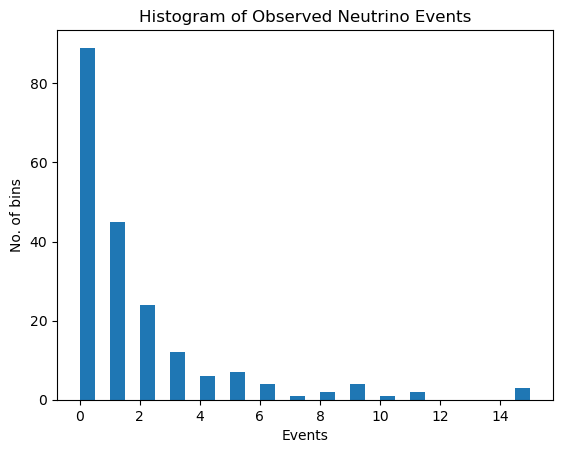

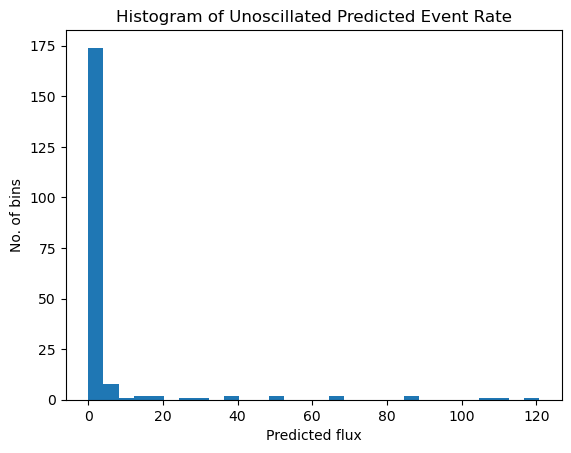

In [4]:
# plot histogram

plt.hist(data, bins = 30)
plt.xlabel('Events')
plt.ylabel('No. of bins')
plt.title('Histogram of Observed Neutrino Events')
plt.show()
plt.close()

plt.hist(flux, bins = 30)
plt.xlabel('Predicted flux')
plt.ylabel('No. of bins')
plt.title('Histogram of Unoscillated Predicted Event Rate')
plt.show()
plt.close()

# Histogram Results

Neutrino histogram looks like a decaying discrete distribution with a huge spike at 0, we're dealing with low stats data - given as neutrinos only come from the weak force 

Flux graph essentially shows that we have a concentrated beam

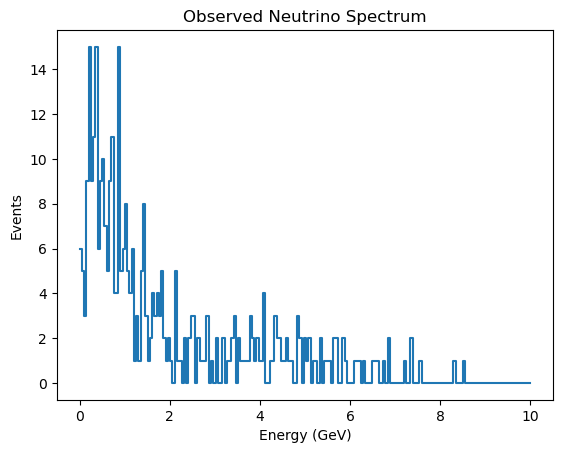

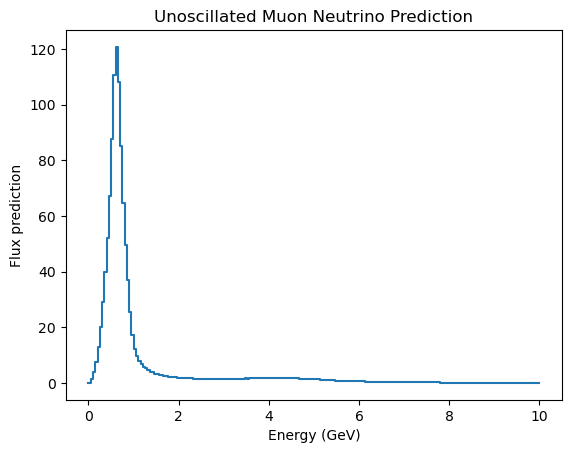

In [21]:
# flux and events plotted against energy
# where = 'post' used to hold value in the bin until end (as opposed to a value change mid-way) - just for cleanness 
# probably won't keep the above all the way as it makes no change to actual analysis

E = np.linspace(0,10,200)
plt.step(E, data, where = 'post')
plt.xlabel('Energy (GeV)')
plt.ylabel('Events')
plt.title('Observed Neutrino Spectrum')
plt.show()
plt.close()

plt.step(E, flux, where = 'post')
plt.xlabel('Energy (GeV)')
plt.ylabel('Flux prediction')
plt.title('Unoscillated Muon Neutrino Prediction')
plt.show()
plt.close()

# Explaination
Used energy from 0-10GeV as given range

Events vs Energy

Very jagged/noisy data - intrinsic to how the data was simulated/event counts - however we can see that it is roughly concentrated in the same region as the predicted (unoscillated) flux. Direct reason to use NLL as opposed to $\chi^2$ as individiual bins don't provide much statistically.

Noise from huge Poisson fluctuations (standard use for event counts) as the typical size of the count $\lambda \lesssim 1$ therefore relative uncertainty (std. dev/mean) $\frac{\sqrt{\lambda}}{\lambda} \approx 100\%$ which means fluctuations are as big as the signal

Unoscillated flux vs Energy

Smooth curve/peak at around ~1GeV

Essentially what event rate would be without neutrino oscillations

If graphed together we should see that both peaks will be around the same regions but the observed data will sit lower in events as the oscillation will reduce the survivability of the neutrino (flavours)


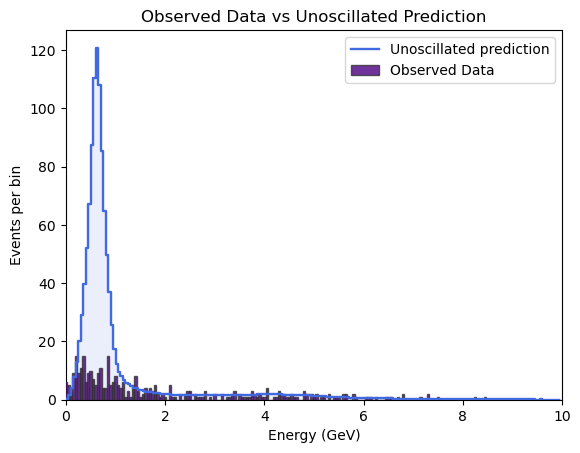

In [57]:
# both plots on same graph
E = np.linspace(0, 10, 200, endpoint=False)



plt.bar(E, data, width=0.05, edgecolor='0.2', color = 'indigo', alpha = 0.8, label = 'Observed Data', zorder = 3)
plt.step(E, flux, where='post', linewidth=1.7, label='Unoscillated prediction', zorder=4, color = 'royalblue')
plt.xlabel('Energy (GeV)')
plt.ylabel('Events per bin')
plt.title('Observed Data vs Unoscillated Prediction')
plt.fill_between(E, flux, step = 'post', alpha = 0.1, zorder = 1, color = 'royalblue')
plt.xlim(0, 10)
plt.legend()
plt.show()
plt.close()